# Prepare pyplot


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Make the figures a bit bigger
#plt.rcParams['figure.figsize'] = (5, 5) 

# Load training data

In [2]:
from keras.datasets import mnist

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

Using TensorFlow backend.


X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


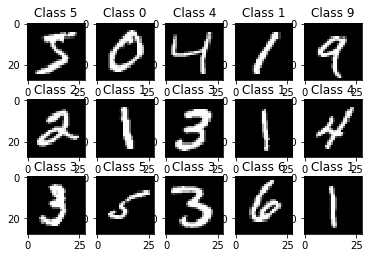

In [3]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
#print("Training matrix example", X_train[0])

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
from keras.utils import np_utils
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Training matrix example")
print(Y_train[0:5])

Training matrix example
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


# Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network. 
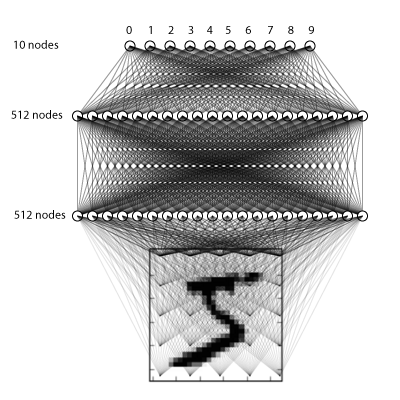

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

model1 = Sequential()
model1.add(Dense(input_dim=784, units=500, activation='sigmoid'))
model1.add(Dense(units=500, activation='sigmoid'))
model1.add(Dense(units=10, activation='softmax')) 
model1.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

model2 = Sequential()
model2.add(Dense(input_dim=784, units=500, activation='sigmoid'))
model2.add(Dense(units=500, activation='sigmoid'))
model2.add(Dense(units=10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy']) 

model3 = Sequential()
model3.add(Dense(input_dim=784, units=500, activation='relu'))
model3.add(Dense(units=500, activation='relu'))
model3.add(Dense(units=10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy']) 

model4 = Sequential()
model4.add(Dense(input_dim=784, units=500, activation='relu'))
model4.add(Dense(units=500, activation='relu'))
model4.add(Dense(units=10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy']) 

model5 = Sequential()
model5.add(Dense(input_dim=784, units=500, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(units=500, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(units=10, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train the model!

In [7]:
history1 = model1.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))
history2 = model2.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))
history3 = model3.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))
history4 = model4.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))
history5 = model5.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.0901 - acc: 0.1252 - val_loss: 0.0896 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0894 - acc: 0.1772 - val_loss: 0.0892 - val_acc: 0.3205
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0890 - acc: 0.2401 - val_loss: 0.0887 - val_acc: 0.2583
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0885 - acc: 0.2674 - val_loss: 0.0882 - val_acc: 0.3633
Epoch 5/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0880 - acc: 0.2978 - val_loss: 0.0876 - val_acc: 0.2940
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0873 - acc: 0.2992 - val_loss: 0.0869 - val_acc: 0.4100
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0866 - acc: 0.3117 - val_loss: 0.0860 - 

60000/60000 [==============================] - 8s 133us/step - loss: 0.0066 - acc: 0.9994 - val_loss: 0.0617 - val_acc: 0.9829
Epoch 20/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0057 - acc: 0.9996 - val_loss: 0.0633 - val_acc: 0.9819
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.2126 - acc: 0.9368 - val_loss: 0.0969 - val_acc: 0.9686
Epoch 2/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0793 - acc: 0.9748 - val_loss: 0.0795 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0507 - acc: 0.9845 - val_loss: 0.0817 - val_acc: 0.9741
Epoch 4/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0384 - acc: 0.9872 - val_loss: 0.0835 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0280 - acc: 0.9908 - val_loss: 0.0825 - val_acc: 0

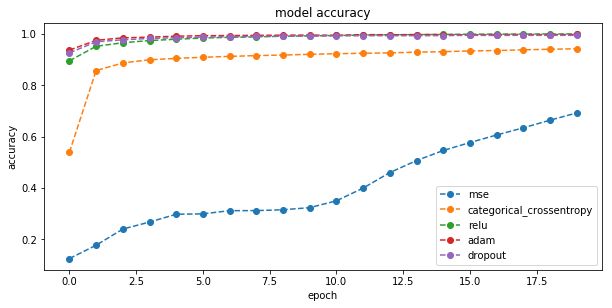

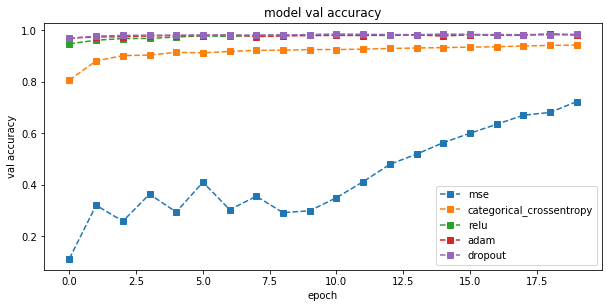

In [8]:
plt.rcParams['figure.figsize'] = (10, 10) 

plt.subplot(211)
plt.plot(history1.history['acc'], marker='o', linestyle='--')
plt.plot(history2.history['acc'], marker='o', linestyle='--')
plt.plot(history3.history['acc'], marker='o', linestyle='--')
plt.plot(history4.history['acc'], marker='o', linestyle='--')
plt.plot(history5.history['acc'], marker='o', linestyle='--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['mse', 'categorical_crossentropy', 'relu', 'adam', 'dropout'], loc='lower right')
plt.show()

plt.subplot(212)
plt.plot(history1.history['val_acc'], marker='s', linestyle='--')
plt.plot(history2.history['val_acc'], marker='s', linestyle='--')
plt.plot(history3.history['val_acc'], marker='s', linestyle='--')
plt.plot(history4.history['val_acc'], marker='s', linestyle='--')
plt.plot(history5.history['val_acc'], marker='s', linestyle='--')
plt.title('model val accuracy')
plt.ylabel('val accuracy')
plt.xlabel('epoch')
plt.legend(['mse', 'categorical_crossentropy', 'relu', 'adam', 'dropout'], loc='lower right')
plt.show()

# Finally, evaluate its performance

In [9]:
score = model5.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0761472089224
Test accuracy: 0.9832


# Inspecting the output

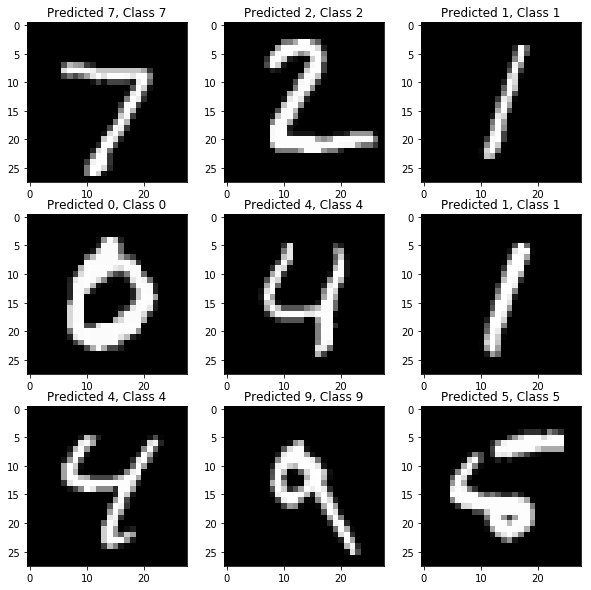

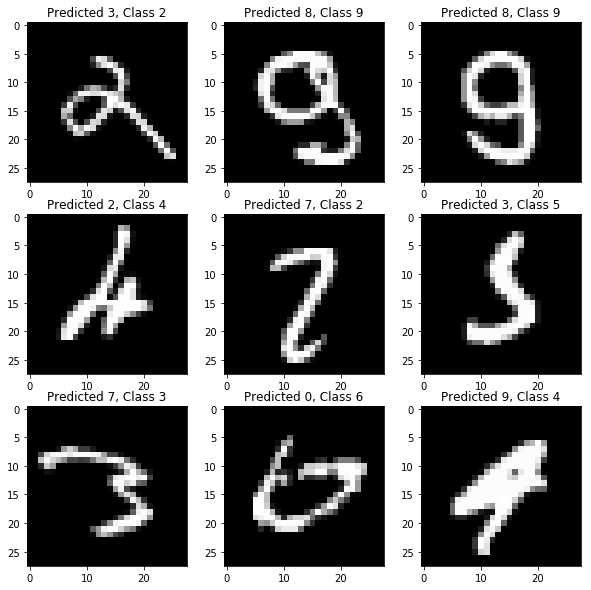

In [10]:
predicted_classes = model5.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))